Assignment 2: Data Visualization

The problems in this assignment are based on the exercise 3.4 of Chapter 3 in Data Mining for Business Analytics.

Data: The file LaptopSales.csv is a comma-separated file with nearly 300,000 rows. The European Network for Business and Industrial Statistics (ENBIS) provided these data as part of a contest organized in the fall of 2009.

Scenario: You are a new analyst for Acell, a company selling laptops. You have been provided with data about products and sales. Your task is to help the company to plan product strategy and pricing policies that will maximize Acell's projected revenues for 2009.

To start, open a new jupyter notebook and give it a name (for example, HW2 or Assignment#). The next step is to define the data directory and to load the data file. See the jupyter notebook for Chapter 2 for how this is done. Use numpy, pandas and seaborn for this analysis.


In [1]:
import matplotlib.pylab as plt
%matplotlib inline
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np



Question 1 (2 points) Load the laptop sales data into jupyter notebook and check if it is loaded successfully. (Optional: Observe how pandas handles the variable/column names, as compared to original names in csv file, when data is read. It will be useful to tweak the variable names for your own convenience; e.g. remove spaces.


In [2]:
# Load the data
laptop_df = pd.read_csv("dmba/LaptopSales.csv")

In [3]:
# Verify data is loaded correctly
print("Shape", laptop_df.shape)  # determine data frame dimensions
laptop_df.head(15)  # view the first 15 observations

Shape (297572, 16)


,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,customer X,customer Y,store X,store Y
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455.0,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545.0,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515.0,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395.0,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585.0,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0
5,1/1/2008 0:12,309,W1B 5PX,SW1V 4QQ,555.0,15,6,1,2.0,Yes,120,Yes,529207,180969,528924.0,178440.0
6,1/1/2008 0:14,75,SE25 4LX,SE8 3JD,465.0,15,4,2,2.0,No,80,Yes,534575,168236,537175.0,177885.0
7,1/1/2008 0:17,346,N7 6AR,E2 0RY,450.0,15,6,2,1.5,No,40,No,530461,186176,535652.0,182961.0
8,1/1/2008 0:24,70,W3 7JT,SW18 1NN,455.0,15,4,2,2.0,Yes,120,No,520898,180071,525155.0,175180.0
9,1/1/2008 0:56,351,SW8 1RB,SW1V 4QQ,620.0,15,6,2,1.5,No,300,Yes,530298,177435,528924.0,178440.0


In [4]:
# Print the list of variables to the screen
for variable_name in laptop_df.columns:
    print(variable_name)

Date
Configuration
Customer Postcode
Store Postcode
Retail Price
Screen Size (Inches)
Battery Life (Hours)
RAM (GB)
Processor Speeds (GHz)
Integrated Wireless?
HD Size (GB)
Bundled Applications?
customer X
customer Y
store X
store Y


In [5]:
# Rename/tweak the variable names for your own convenience; e.g. remove spaces.
laptop_df = laptop_df.rename(columns={
    'Customer Postcode': 'Customer_Postcode',
    'Store Postcode': 'Store_Postcode',
    'Retail Price': 'Retail_Price', 
    'Screen Size (Inches)': 'Screen_Size_Inches', 
    'Battery Life (Hours)': 'Battery_Life_Hours',
    'RAM (GB)': 'RAM_GB',
    'Processor Speeds (GHz)': 'Processor_Speeds_GHz',
    'Integrated Wireless?': 'Integrated_Wireless',
    'HD Size (GB)': 'HD_Size_GB',
    'Bundled Applications?': 'Bundled_Applications',
    'customer X': 'customer_X', 
    'customer Y': 'customer_Y',
})

In [6]:
# Print the list of renamed variables to the screen
for variable_name in laptop_df.columns:
    print(variable_name)

Date
Configuration
Customer_Postcode
Store_Postcode
Retail_Price
Screen_Size_Inches
Battery_Life_Hours
RAM_GB
Processor_Speeds_GHz
Integrated_Wireless
HD_Size_GB
Bundled_Applications
customer_X
customer_Y
store X
store Y


Question 2 (2 points) What is the data type of each of the variable in data? Check using appropriate pandas fields. Hint: dtype or dtypes will do the job for you. Had you expected exactly the same data types as shown by pandas? Comment. Convert to more appropriate types (e.g. datetime, category).


In [7]:
# Confirm data type of each of the variables in the data.
laptop_df.dtypes

Date                     object
Configuration             int64
Customer_Postcode        object
Store_Postcode           object
Retail_Price            float64
Screen_Size_Inches        int64
Battery_Life_Hours        int64
RAM_GB                    int64
Processor_Speeds_GHz    float64
Integrated_Wireless      object
HD_Size_GB                int64
Bundled_Applications     object
customer_X                int64
customer_Y                int64
store X                 float64
store Y                 float64
dtype: object

In [8]:
# Converting to more appropriate types (e.g. datetime, category)
## Converting object column for Date to datetime
laptop_df['Date'] = pd.to_datetime(laptop_df.Date)
## Converting object columns for Customer_Postcode, Store_Postcode, Integrated Wireless and Bundled_Applications to category
laptop_df.Customer_Postcode = laptop_df.Customer_Postcode.astype('category')
laptop_df.Store_Postcode = laptop_df.Store_Postcode.astype('category')
laptop_df.Integrated_Wireless = laptop_df.Integrated_Wireless.astype('category')
laptop_df.Bundled_Applications = laptop_df.Bundled_Applications.astype('category')

laptop_df.dtypes

Date                    datetime64[ns]
Configuration                    int64
Customer_Postcode             category
Store_Postcode                category
Retail_Price                   float64
Screen_Size_Inches               int64
Battery_Life_Hours               int64
RAM_GB                           int64
Processor_Speeds_GHz           float64
Integrated_Wireless           category
HD_Size_GB                       int64
Bundled_Applications          category
customer_X                       int64
customer_Y                       int64
store X                        float64
store Y                        float64
dtype: object

Question 3 (3 points) Are there any missing values in the data? Report the findings.


In [9]:
# Per the Chapter 02 - Overview.ipynb the count method provides info on data of each column
laptop_df.count()

Date                    297364
Configuration           297572
Customer_Postcode       297572
Store_Postcode          297572
Retail_Price            284129
Screen_Size_Inches      297572
Battery_Life_Hours      297572
RAM_GB                  297572
Processor_Speeds_GHz    297572
Integrated_Wireless     297572
HD_Size_GB              297572
Bundled_Applications    297572
customer_X              297572
customer_Y              297572
store X                 297424
store Y                 297424
dtype: int64

In [10]:
len(laptop_df)

297572

In [11]:
# Number of missing values equals the dataframe length minus the count
print("The number of missing values in the dataframe per column is as follows:\n")
print((len(laptop_df) - laptop_df.count()))

The number of missing values in the dataframe per column is as follows:

Date                      208
Configuration               0
Customer_Postcode           0
Store_Postcode              0
Retail_Price            13443
Screen_Size_Inches          0
Battery_Life_Hours          0
RAM_GB                      0
Processor_Speeds_GHz        0
Integrated_Wireless         0
HD_Size_GB                  0
Bundled_Applications        0
customer_X                  0
customer_Y                  0
store X                   148
store Y                   148
dtype: int64


Question 4 (3 points) Observe the missing values graphically and comment on it. (Hint: use seaborn's heatmap)


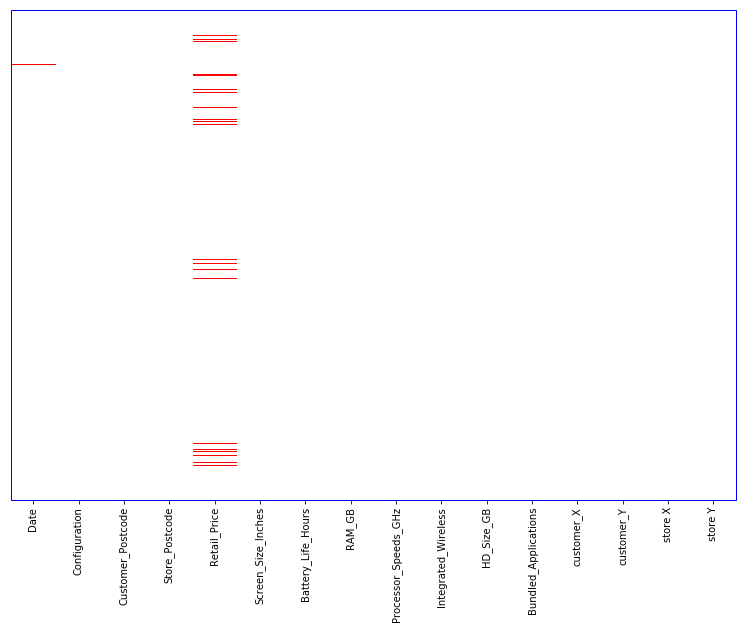

In [12]:
# Using coding provided in the Chapter 03 - Data visualization.ipynb
naInfo = np.zeros(laptop_df.shape)
naInfo[laptop_df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=laptop_df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False, ax=ax)
#ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

# Draw a rectangle around the graph
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                     edgecolor='blue',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

The missing values for Retail_Price are prominent enough to be visible in the heatmap, but the other missing values (i.e. for Date, store_X and store_Y are not).

Question 5 (3 points) At what average and median price do the laptops sell? Hint: Use distribution of values to answer this question.


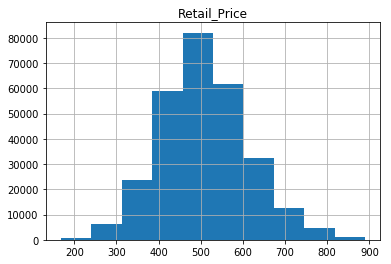

In [13]:
ax = laptop_df.hist(column='Retail_Price')

In [14]:
print("The median retail price was $%s." % laptop_df['Retail_Price'].median())
print("The mean retail price was $%s." % laptop_df['Retail_Price'].mean())
print("The minimum retail price was $%s." % laptop_df['Retail_Price'].min())
print("The maximum retail price was $%s." % laptop_df['Retail_Price'].max())

The median retail price was $500.0.
The mean retail price was $508.12593575453405.
The minimum retail price was $168.0.
The maximum retail price was $890.0.


A histogram of price shows the approximate symmetric shape of the price distribution between 168 and 890.

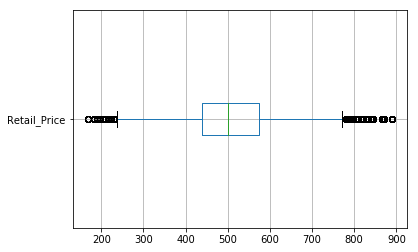

In [15]:
# Using the argument vert to create a horizontal boxplot
ax = laptop_df.boxplot(column='Retail_Price', vert=False)

The horizontal boxplot corroborates that the median price is about $500 and that the laptops sell for prices between the 168 and 890 dollars.

Question 6 (4 points) Compare retail prices across stores. Do prices vary across the stores? Which stores look costly in general?


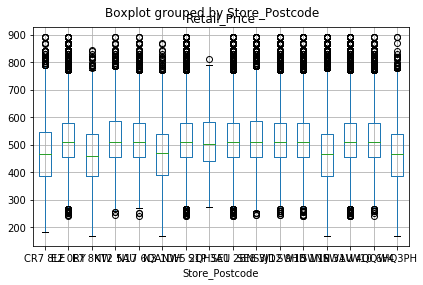

In [16]:
# Using the argument vert creates vertical boxplots
ax = laptop_df.boxplot(column='Retail_Price', by='Store_Postcode', vert=True)
# Suppress the titles
#plt.suptitle('')  
#plt.title('')

plt.tight_layout()  # Increase the separation between the plots
plt.show()

The vertical boxplots show that all of the stores have a median retail price in the vicinity of $500.

Question 7 (3 points) Does price of laptop vary according to integrated wireless?


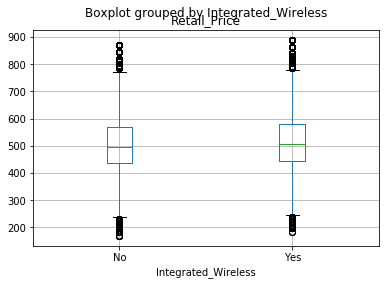

In [17]:
ax = laptop_df.boxplot(column='Retail_Price', by='Integrated_Wireless')

No, the boxplot comparison does not show that the price of laptop varies according to integrated wireless.

Question 8 (6 points) Draw the scatter plot of retail prices versus

    Screen Size
    Battery Life
    RAM
    Processor
    HD Size
    Configuration

Comment on the utility of these scatter plots.


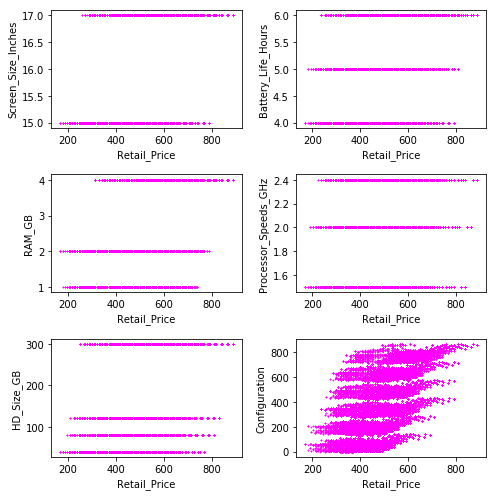

In [18]:
# Showing all graphs in one 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
columns = ['Screen_Size_Inches', 'Battery_Life_Hours', 'RAM_GB', 'Processor_Speeds_GHz', 
           'HD_Size_GB', 'Configuration']
for i, column in enumerate(columns):
    laptop_df.plot(kind='scatter', x='Retail_Price', y=column, s=0.1, ax=axes[i // 2, i % 2], color="magenta")
plt.tight_layout()

Question 9 (5 points) In your opinion, which of the configurations make the biggest difference in the laptop price?

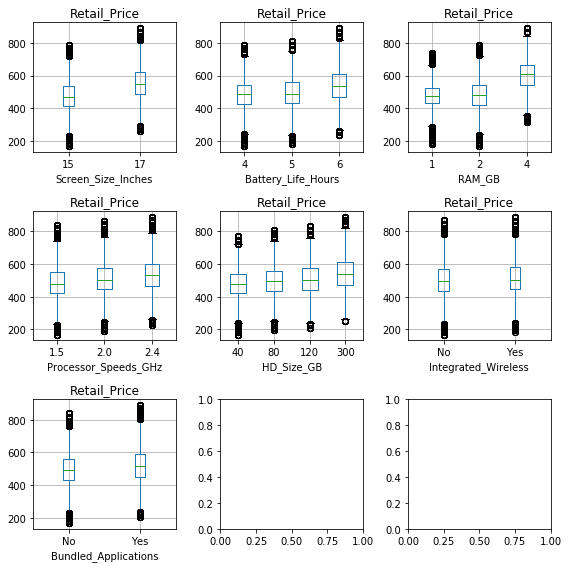

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
columns = ['Screen_Size_Inches', 'Battery_Life_Hours', 'RAM_GB', 'Processor_Speeds_GHz', 
           'HD_Size_GB', 'Integrated_Wireless', 'Bundled_Applications']
for i, column in enumerate(columns):
    laptop_df.boxplot(column='Retail_Price', by=column, ax=axes[i // 3, i % 3])
plt.tight_layout()
# Suppress the titles
plt.suptitle('')  
#plt.title('')

plt.tight_layout()  # Increase the separation between the plots
plt.show()

Screen size, maximum battery life, and maximum GB ram make the biggest difference in retail price.